In [1]:
import pandas as pd

# Replace 'file_path' with the actual path to your CSV file
file_path = 'Motor_Vehicle_Collisions_-_Crashes.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [2]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/09/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,26/03/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,29/06/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,11/09/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,14/12/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,23/05/2023,15:17,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,...,Unspecified,NaN,NaN,NaN,4631865,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
179917,22/05/2023,21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,...,Driver Inattention/Distraction,NaN,NaN,NaN,4632025,Sedan,Sedan,NaN,NaN,NaN
179918,23/05/2023,18:04,NaN,NaN,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,...,Unspecified,NaN,NaN,NaN,4631515,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
179919,19/11/2023,1:21,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,...,NaN,NaN,NaN,NaN,4680998,Pick-up Truck,Sedan,NaN,NaN,NaN


In [3]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the columns and their data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179921 entries, 0 to 179920
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     179921 non-null  object 
 1   CRASH TIME                     179921 non-null  object 
 2   BOROUGH                        118160 non-null  object 
 3   ZIP CODE                       118137 non-null  float64
 4   LATITUDE                       164788 non-null  float64
 5   LONGITUDE                      164788 non-null  float64
 6   LOCATION                       164788 non-null  object 
 7   ON STREET NAME                 130909 non-null  object 
 8   CROSS STREET NAME              83247 non-null   object 
 9   OFF STREET NAME                49010 non-null   object 
 10  NUMBER OF PERSONS INJURED      179920 non-null  float64
 11  NUMBER OF PERSONS KILLED       179921 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

In [4]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], dayfirst=True)
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

# Convert 'ZIP CODE' to string
df['ZIP CODE'] = df['ZIP CODE'].astype(str)

# Step 3: Feature Engineering
# Extract day of the week, month, and year from 'CRASH DATE'
df['DAY OF WEEK'] = df['CRASH DATE'].dt.dayofweek
df['MONTH'] = df['CRASH DATE'].dt.month
df['YEAR'] = df['CRASH DATE'].dt.year

# Extract hour from 'CRASH TIME'
df['HOUR'] = df['CRASH TIME'].dt.hour

# Create a new column indicating whether a crash occurred during the day or night
df['DAY/NIGHT'] = df['CRASH TIME'].apply(lambda x: 'Day' if x.hour >= 6 and x.hour < 18 else 'Night')

C:\Users\GGPC\AppData\Local\Temp\ipykernel_12064\359495723.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179921 entries, 0 to 179920
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     179921 non-null  datetime64[ns]
 1   CRASH TIME                     179921 non-null  datetime64[ns]
 2   BOROUGH                        118160 non-null  object        
 3   ZIP CODE                       179921 non-null  object        
 4   LATITUDE                       164788 non-null  float64       
 5   LONGITUDE                      164788 non-null  float64       
 6   LOCATION                       164788 non-null  object        
 7   ON STREET NAME                 130909 non-null  object        
 8   CROSS STREET NAME              83247 non-null   object        
 9   OFF STREET NAME                49010 non-null   object        
 10  NUMBER OF PERSONS INJURED      179920 non-null  float64       
 11  

In [6]:
df.drop(columns=['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
                 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                 'CONTRIBUTING FACTOR VEHICLE 5'], inplace=True)

In [7]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,DAY OF WEEK,MONTH,YEAR,HOUR,DAY/NIGHT
0,2021-09-11,2024-03-24 02:39:00,NaN,nan,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,5,9,2021,2,Night
1,2022-03-26,2024-03-24 11:45:00,NaN,nan,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Pavement Slippery,NaN,4513547,Sedan,NaN,5,3,2022,11,Day
2,2022-06-29,2024-03-24 06:55:00,NaN,nan,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,2,6,2022,6,Day
3,2021-09-11,2024-03-24 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,Unspecified,NaN,4456314,Sedan,NaN,5,9,2021,9,Day
4,2021-12-14,2024-03-24 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,4486609,NaN,NaN,1,12,2021,8,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,2023-05-23,2024-03-24 15:17:00,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,...,Failure to Yield Right-of-Way,Unspecified,4631865,Station Wagon/Sport Utility Vehicle,Sedan,1,5,2023,15,Day
179917,2023-05-22,2024-03-24 21:30:00,NaN,nan,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,...,Driver Inattention/Distraction,Driver Inattention/Distraction,4632025,Sedan,Sedan,0,5,2023,21,Night
179918,2023-05-23,2024-03-24 18:04:00,NaN,nan,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,...,Following Too Closely,Unspecified,4631515,Sedan,Tractor Truck Diesel,1,5,2023,18,Night
179919,2023-11-19,2024-03-24 01:21:00,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,...,Unspecified,NaN,4680998,Pick-up Truck,Sedan,6,11,2023,1,Night


In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [9]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,DAY OF WEEK,MONTH,YEAR,HOUR,DAY/NIGHT
0,2021-09-11,2024-03-24 02:39:00,NaN,nan,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,5,9,2021,2,Night
1,2022-03-26,2024-03-24 11:45:00,NaN,nan,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Pavement Slippery,NaN,4513547,Sedan,NaN,5,3,2022,11,Day
2,2022-06-29,2024-03-24 06:55:00,NaN,nan,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,2,6,2022,6,Day
3,2021-09-11,2024-03-24 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,Unspecified,NaN,4456314,Sedan,NaN,5,9,2021,9,Day
4,2021-12-14,2024-03-24 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,4486609,NaN,NaN,1,12,2021,8,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,2023-05-23,2024-03-24 15:17:00,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,...,Failure to Yield Right-of-Way,Unspecified,4631865,Station Wagon/Sport Utility Vehicle,Sedan,1,5,2023,15,Day
179917,2023-05-22,2024-03-24 21:30:00,NaN,nan,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,...,Driver Inattention/Distraction,Driver Inattention/Distraction,4632025,Sedan,Sedan,0,5,2023,21,Night
179918,2023-05-23,2024-03-24 18:04:00,NaN,nan,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,...,Following Too Closely,Unspecified,4631515,Sedan,Tractor Truck Diesel,1,5,2023,18,Night
179919,2023-11-19,2024-03-24 01:21:00,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,...,Unspecified,NaN,4680998,Pick-up Truck,Sedan,6,11,2023,1,Night


In [10]:
# Displaying all columns and their values for the first record
first_record = df.iloc[0]
print(first_record)


CRASH DATE                                2021-09-11 00:00:00
CRASH TIME                                2024-03-24 02:39:00
BOROUGH                                                   NaN
ZIP CODE                                                  nan
LATITUDE                                                  NaN
LONGITUDE                                                 NaN
LOCATION                                                  NaN
ON STREET NAME                          WHITESTONE EXPRESSWAY
CROSS STREET NAME                                   20 AVENUE
OFF STREET NAME                                           NaN
NUMBER OF PERSONS INJURED                                 2.0
NUMBER OF PERSONS KILLED                                    0
NUMBER OF PEDESTRIANS INJURED                               0
NUMBER OF PEDESTRIANS KILLED                                0
NUMBER OF CYCLIST INJURED                                   0
NUMBER OF CYCLIST KILLED                                    0
NUMBER O

Frequency of crashes by day of the week:
CRASH DATE
0    25184
1    25406
2    25645
3    26026
4    28333
5    25768
6    23559
Name: count, dtype: int64

Frequency of crashes by month:
CRASH DATE
1     15631
2     14351
3     17105
4     17287
5     19783
6     20053
7     18798
8     18170
9     10486
10    10241
11     9429
12     8587
Name: count, dtype: int64

Frequency of crashes by year:
CRASH DATE
2021    110525
2022     69228
2023       131
2024        37
Name: count, dtype: int64



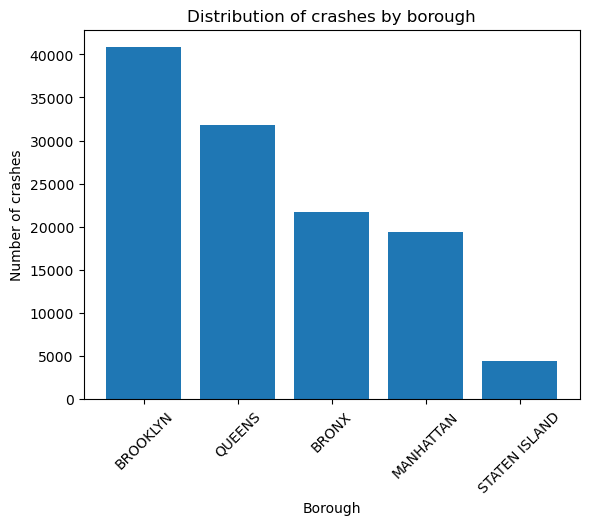

Summary statistics of injuries and fatalities:
       NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
count              179920.000000             179921.000000
mean                    0.478496                  0.002601
std                     0.802098                  0.053386
min                     0.000000                  0.000000
25%                     0.000000                  0.000000
50%                     0.000000                  0.000000
75%                     1.000000                  0.000000
max                    40.000000                  3.000000

Top contributing factors:
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       44464
Driver Inattention/Distraction    43651
Failure to Yield Right-of-Way     12280
Following Too Closely             11876
Passing or Lane Usage Improper     8105
Passing Too Closely                6946
Unsafe Speed                       6286
Backing Unsafely                   5704
Traffic Control Disregarded        5068
Other

In [11]:
# Temporal Analysis
# Analyze the frequency of crashes over different time periods such as days of the week, months, or years.
# This could help identify any temporal patterns or trends in crash occurrences.

# Frequency of crashes by day of the week
crashes_by_dayofweek = df['CRASH DATE'].dt.dayofweek.value_counts().sort_index()
print("Frequency of crashes by day of the week:")
print(crashes_by_dayofweek)
print()

# Frequency of crashes by month
crashes_by_month = df['CRASH DATE'].dt.month.value_counts().sort_index()
print("Frequency of crashes by month:")
print(crashes_by_month)
print()

# Frequency of crashes by year
crashes_by_year = df['CRASH DATE'].dt.year.value_counts().sort_index()
print("Frequency of crashes by year:")
print(crashes_by_year)
print()


# Geospatial Analysis
# Explore the distribution of crashes across different boroughs or areas using latitude and longitude coordinates.
# You can visualize this using maps to identify hotspots or areas with high crash rates.

# Visualizing distribution of crashes by borough
import matplotlib.pyplot as plt

borough_crashes = df['BOROUGH'].value_counts()
plt.bar(borough_crashes.index, borough_crashes.values)
plt.title("Distribution of crashes by borough")
plt.xlabel("Borough")
plt.ylabel("Number of crashes")
plt.xticks(rotation=45)
plt.show()


# Severity Analysis
# Analyze the severity of crashes by analyzing the number of persons injured or killed in each crash.
# This could involve calculating summary statistics such as mean, median, and distribution of injuries or fatalities.

# Summary statistics of injuries and fatalities
summary_stats = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].describe()
print("Summary statistics of injuries and fatalities:")
print(summary_stats)
print()


# Contributing Factors Analysis
# Analyze the contributing factors associated with each crash, such as aggressive driving, speeding, or distracted driving.
# You could identify the most common contributing factors and their impact on crash severity.

# Frequency of contributing factors
contributing_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
print("Top contributing factors:")
print(contributing_factors)


Top vehicle types involved in crashes:
VEHICLE TYPE CODE 1
Sedan                                  85122
Station Wagon/Sport Utility Vehicle    62844
Taxi                                    4550
Pick-up Truck                           3697
Box Truck                               3078
Bus                                     2985
Bike                                    2575
E-Bike                                  1541
Motorcycle                              1481
Tractor Truck Diesel                    1355
Name: count, dtype: int64

Frequency of crashes by time of day:
DAY/NIGHT
Day      106758
Night     73163
Name: count, dtype: int64

Summary statistics of injuries and fatalities by borough:
               NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
BOROUGH                                                           
BRONX                           0.441077                  0.002260
BROOKLYN                        0.473508                  0.001935
MANHATTAN                       

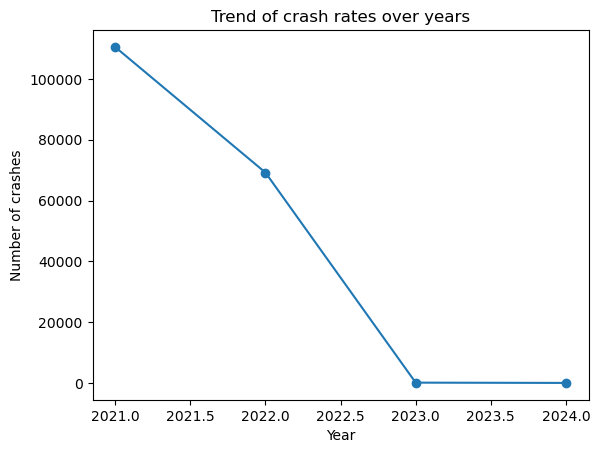

In [12]:
# Vehicle Type Analysis
# Explore the types of vehicles involved in crashes and their impact on crash outcomes.
# Analyze the frequency of different vehicle types involved in crashes and their association with injuries or fatalities.

# Frequency of vehicle types involved in crashes
vehicle_types = df['VEHICLE TYPE CODE 1'].value_counts().head(10)
print("Top vehicle types involved in crashes:")
print(vehicle_types)
print()


# Time of Day Analysis
# Investigate the distribution of crashes by time of day (day vs. night).
# This could help identify any differences in crash rates or severity between daytime and nighttime.

# Frequency of crashes by time of day (day vs. night)
crashes_by_daynight = df['DAY/NIGHT'].value_counts()
print("Frequency of crashes by time of day:")
print(crashes_by_daynight)
print()


# Comparison Across Boroughs
# Compare crash statistics across different boroughs to identify any disparities or differences in crash rates,
# contributing factors, or severity between locations.

# Summary statistics of injuries and fatalities by borough
summary_stats_by_borough = df.groupby('BOROUGH')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].mean()
print("Summary statistics of injuries and fatalities by borough:")
print(summary_stats_by_borough)
print()


# Trend Analysis
# Explore trends in crash data over time, such as whether crash rates or severity have been increasing, decreasing,
# or remaining stable over the years.

# Trend of crash rates over years
crash_rates_over_years = df.groupby('YEAR').size()
plt.plot(crash_rates_over_years.index, crash_rates_over_years.values, marker='o')
plt.title("Trend of crash rates over years")
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.show()


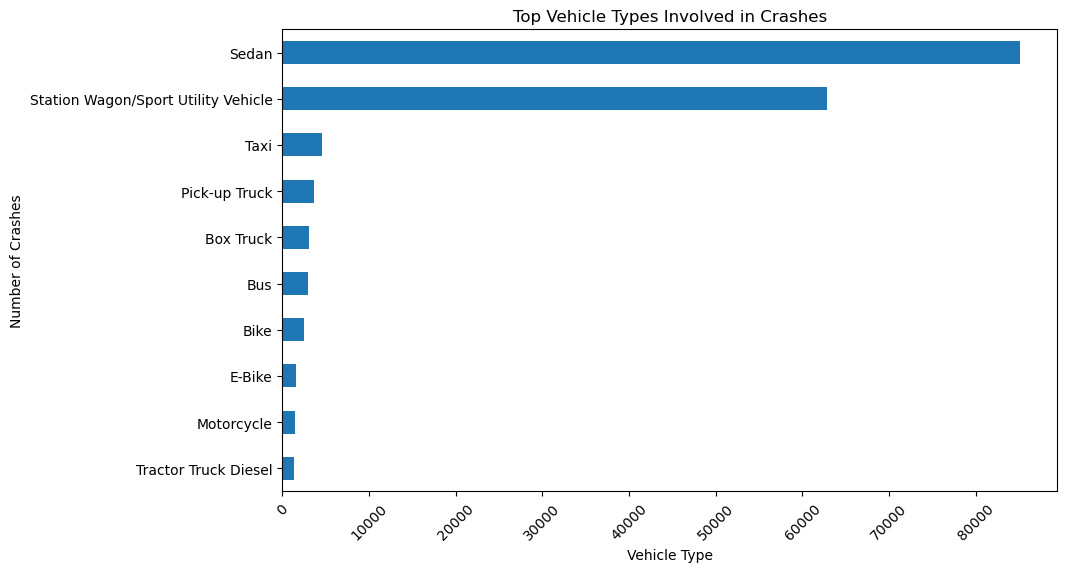

In [13]:
# Plotting the top vehicle types involved in crashes
vehicle_types.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Top Vehicle Types Involved in Crashes')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()


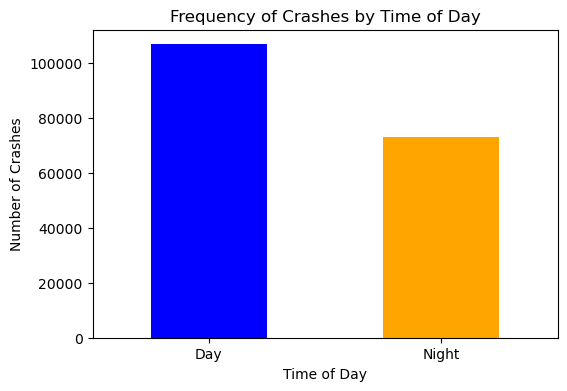

In [14]:
# Plotting the frequency of crashes by time of day
crashes_by_daynight.plot(kind='bar', figsize=(6, 4), color=['blue', 'orange'])
plt.title('Frequency of Crashes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show()


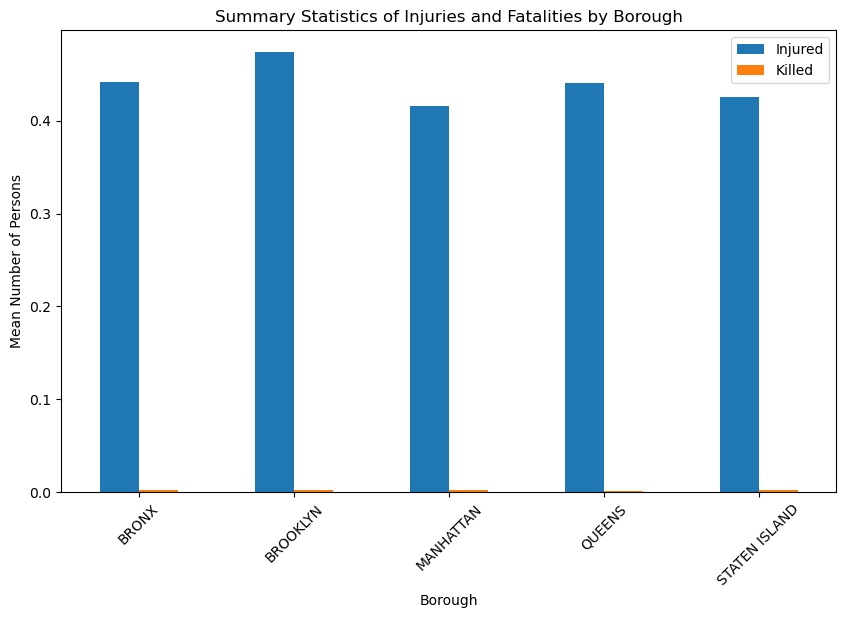

In [15]:
# Plotting summary statistics of injuries and fatalities by borough
summary_stats_by_borough.plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics of Injuries and Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean Number of Persons')
plt.xticks(rotation=45)
plt.legend(['Injured', 'Killed'])
plt.show()


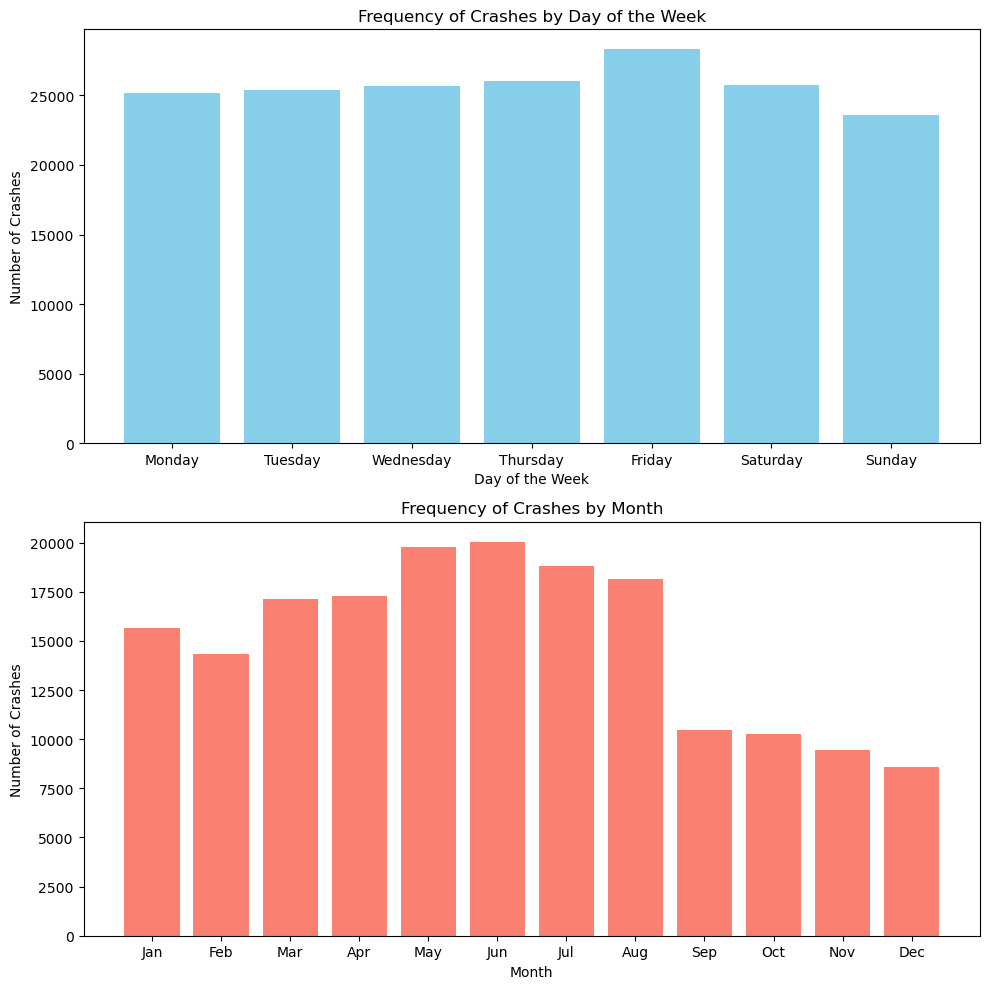

In [16]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot frequency of crashes by day of the week
axes[0].bar(crashes_by_dayofweek.index, crashes_by_dayofweek.values, color='skyblue')
axes[0].set_title('Frequency of Crashes by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Crashes')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot frequency of crashes by month
axes[1].bar(crashes_by_month.index, crashes_by_month.values, color='salmon')
axes[1].set_title('Frequency of Crashes by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Crashes')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout
plt.tight_layout()
plt.show()


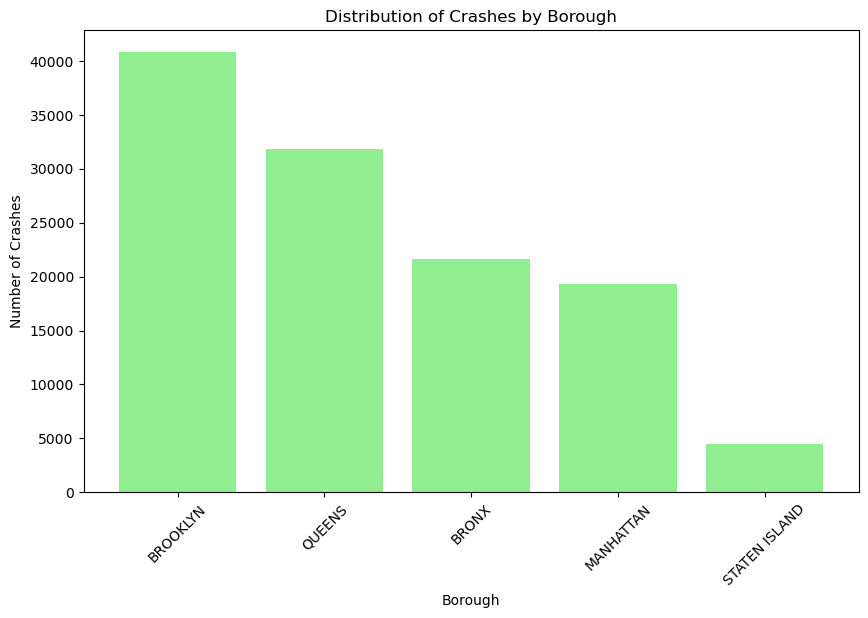

In [17]:
# Plotting distribution of crashes by borough
plt.figure(figsize=(10, 6))
plt.bar(borough_crashes.index, borough_crashes.values, color='lightgreen')
plt.title('Distribution of Crashes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()


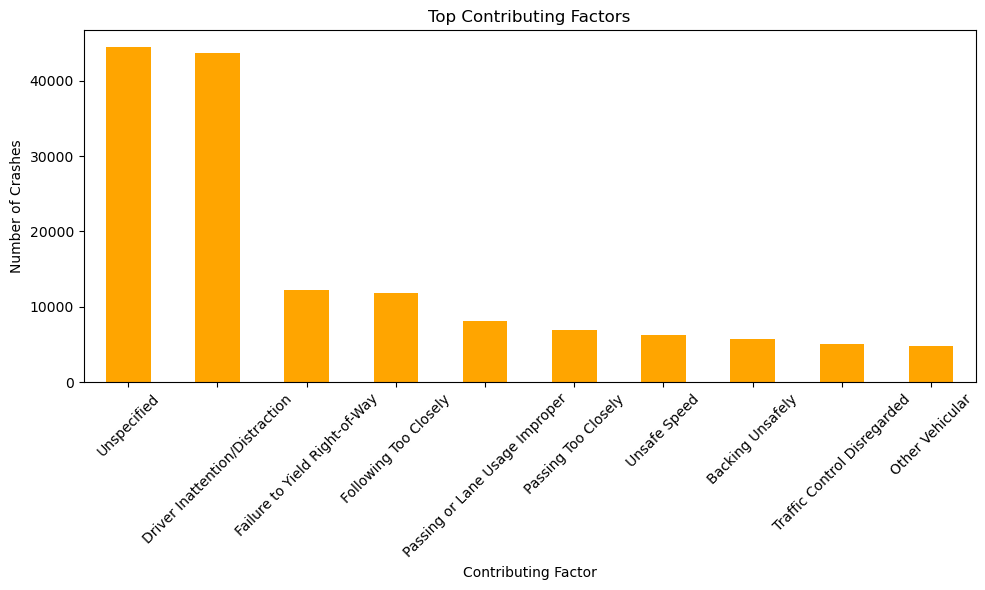

In [18]:
# Plotting top contributing factors
plt.figure(figsize=(10, 6))
contributing_factors.plot(kind='bar', color='orange')
plt.title('Top Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


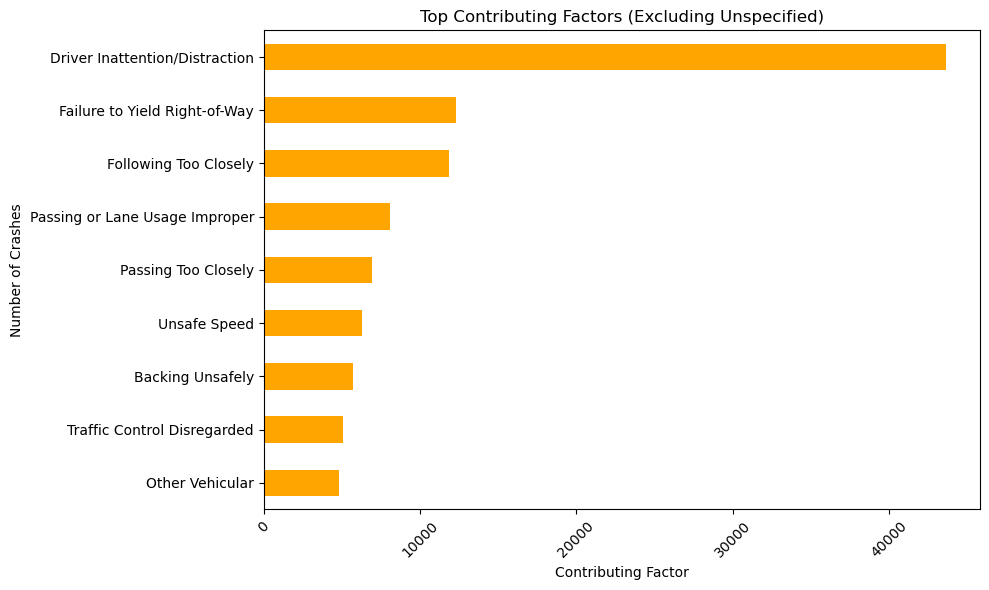

In [19]:
# Plotting top contributing factors (excluding 'Unspecified')
plt.figure(figsize=(10, 6))
contributing_factors.drop('Unspecified', errors='ignore').sort_values().plot(kind='barh', color='orange')
plt.title('Top Contributing Factors (Excluding Unspecified)')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


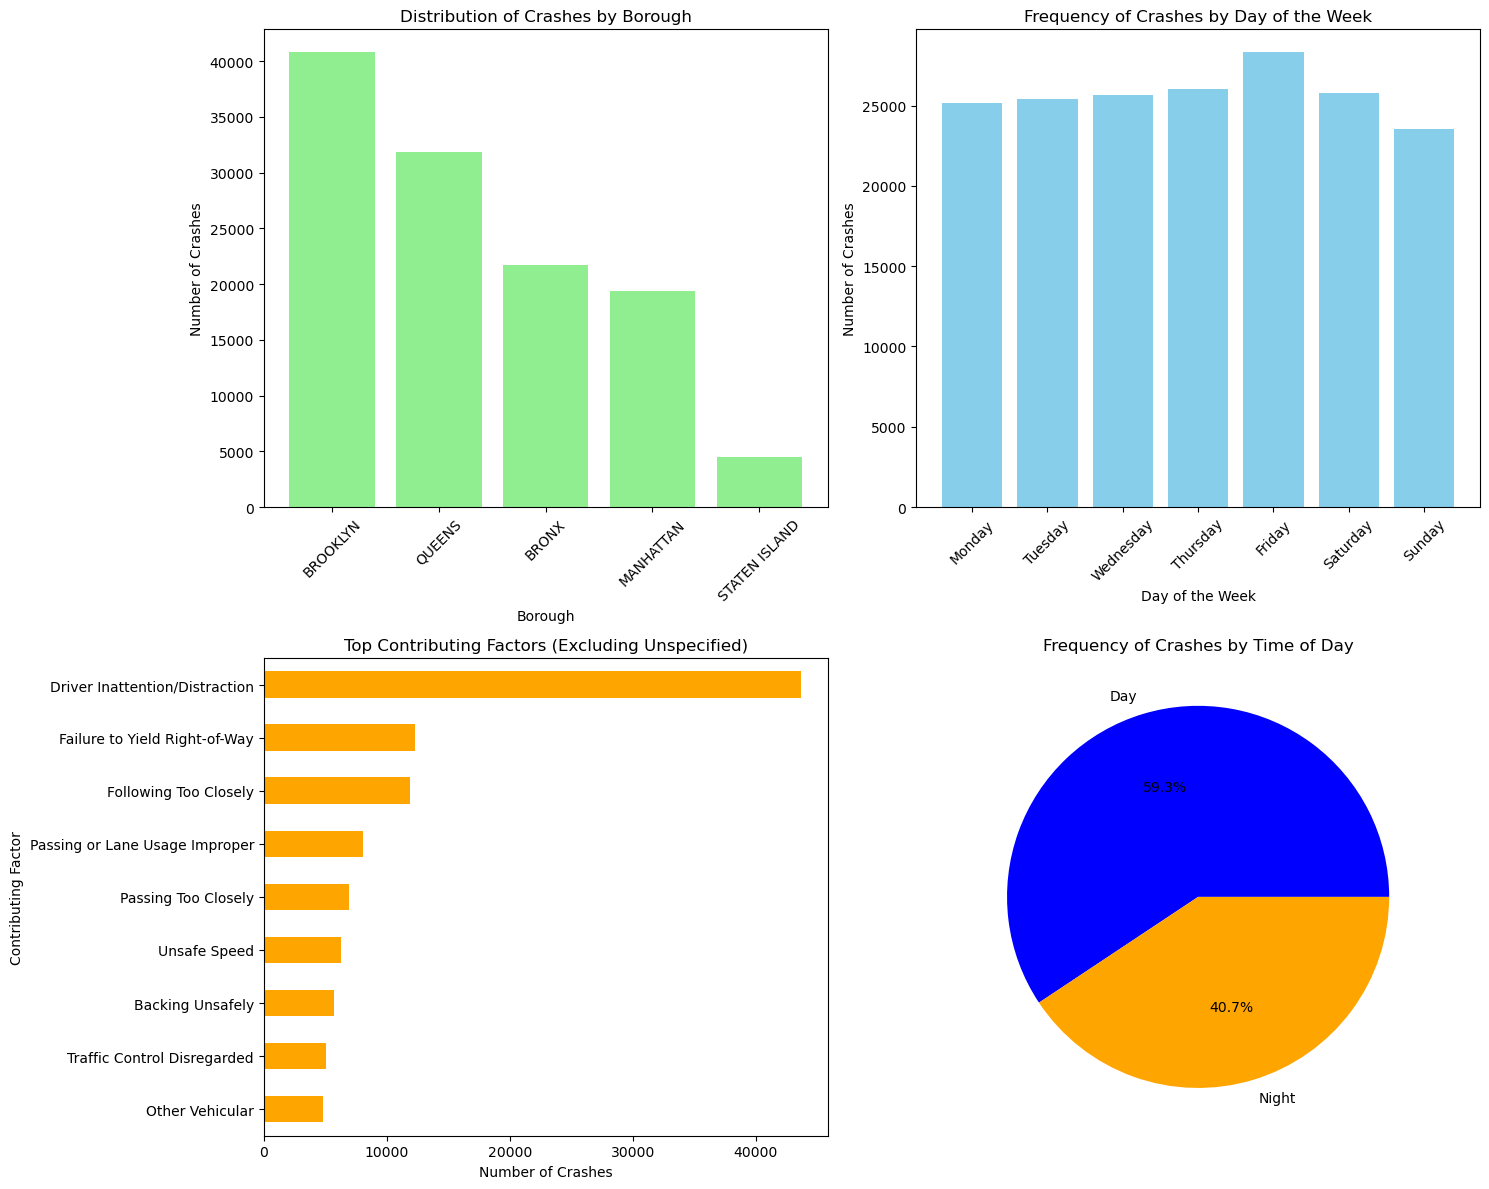

In [20]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Distribution of crashes by borough
axes[0, 0].bar(borough_crashes.index, borough_crashes.values, color='lightgreen')
axes[0, 0].set_title('Distribution of Crashes by Borough')
axes[0, 0].set_xlabel('Borough')
axes[0, 0].set_ylabel('Number of Crashes')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Frequency of crashes by day of the week
axes[0, 1].bar(crashes_by_dayofweek.index, crashes_by_dayofweek.values, color='skyblue')
axes[0, 1].set_title('Frequency of Crashes by Day of the Week')
axes[0, 1].set_xlabel('Day of the Week')
axes[0, 1].set_ylabel('Number of Crashes')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Top contributing factors (excluding 'Unspecified')
contributing_factors.drop('Unspecified', errors='ignore').sort_values().plot(kind='barh', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Top Contributing Factors (Excluding Unspecified)')
axes[1, 0].set_xlabel('Number of Crashes')
axes[1, 0].set_ylabel('Contributing Factor')

# Plot 4: Frequency of crashes by time of day (as a pie chart)
axes[1, 1].pie(crashes_by_daynight.values, labels=crashes_by_daynight.index, autopct='%1.1f%%', colors=['blue', 'orange'])
axes[1, 1].set_title('Frequency of Crashes by Time of Day')

# Adjust layout
plt.tight_layout()
plt.show()


## Summary of Findings

### Frequency of Crashes:
- The number of crashes varies throughout the week, with the highest number occurring on Friday (28,333 crashes) and the lowest on Sunday (23,559 crashes).
- The most common contributing factor to crashes is "Driver Inattention/Distraction" (43,651 crashes), followed by "Failure to Yield Right-of-Way" (12,280 crashes).
- Sedans are the most frequently involved vehicle type in crashes (85,122 crashes), followed by Station Wagons/Sport Utility Vehicles (62,844 crashes).
- Most crashes occur during the day (106,758 crashes) compared to nighttime (73,163 crashes).
- On average, there are approximately 0.44 persons injured and 0.002 persons killed per crash in all boroughs.

### Borough Analysis:
- Brooklyn has the highest average number of persons injured per crash (0.474), while Manhattan has the lowest (0.415).
- The average number of persons killed per crash is consistent across boroughs, ranging from 0.002 to 0.002.

Overall, these findings highlight the frequency and characteristics of motor vehicle crashes in the dataset, including contributing factors, vehicle types, time of day, and borough-level analysis.


In [21]:
# Table of top contributing factors by borough
top_contributing_factors_by_borough = df.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1'])['CONTRIBUTING FACTOR VEHICLE 1'].count().unstack().fillna(0)
top_contributing_factors_by_borough


CONTRIBUTING FACTOR VEHICLE 1,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-Held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,...,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Unspecified,Using On Board Navigation Device,Vehicle Vandalism,View Obstructed/Limited,Windshield Inadequate
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,19.0,199.0,377.0,7.0,811.0,74.0,16.0,0.0,4384.0,371.0,...,12.0,597.0,603.0,284.0,930.0,7067.0,5.0,4.0,251.0,0.0
BROOKLYN,28.0,283.0,654.0,26.0,1413.0,150.0,18.0,1.0,9655.0,708.0,...,23.0,1096.0,850.0,354.0,1113.0,13468.0,1.0,4.0,339.0,1.0
MANHATTAN,14.0,166.0,285.0,8.0,783.0,72.0,12.0,1.0,5272.0,373.0,...,6.0,584.0,487.0,417.0,356.0,4412.0,4.0,5.0,196.0,0.0
QUEENS,26.0,203.0,636.0,34.0,1279.0,139.0,13.0,0.0,7951.0,630.0,...,16.0,1144.0,752.0,336.0,1069.0,7021.0,2.0,4.0,257.0,0.0
STATEN ISLAND,4.0,27.0,101.0,18.0,181.0,37.0,3.0,0.0,1210.0,101.0,...,2.0,104.0,110.0,48.0,115.0,1179.0,1.0,1.0,38.0,0.0


In [22]:
# Table of pedestrian injuries by time of day
pedestrian_injuries_by_time_of_day = df.groupby(['DAY/NIGHT'])['NUMBER OF PEDESTRIANS INJURED'].sum()
pedestrian_injuries_by_time_of_day


DAY/NIGHT
Day      7897
Night    5125
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

In [23]:
# Table of average number of persons injured and killed by vehicle type
vehicle_type_severity = df.groupby('VEHICLE TYPE CODE 1')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].mean()
vehicle_type_severity


,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
VEHICLE TYPE CODE 1,,
''lime mope,1.000000,0.0
.,0.000000,0.0
12 PASSENG,0.000000,0.0
12 passage,5.000000,0.0
2 dr sedan,0.444444,0.0
...,...,...
usps truck,1.000000,0.0
utility,1.000000,0.0
utility tr,0.000000,0.0


In [24]:
# Table of average severity by time of day
severity_by_time_of_day = df.groupby(['DAY/NIGHT'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].mean()
severity_by_time_of_day


,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
DAY/NIGHT,,
Day,0.447390,0.001752
Night,0.523885,0.003841


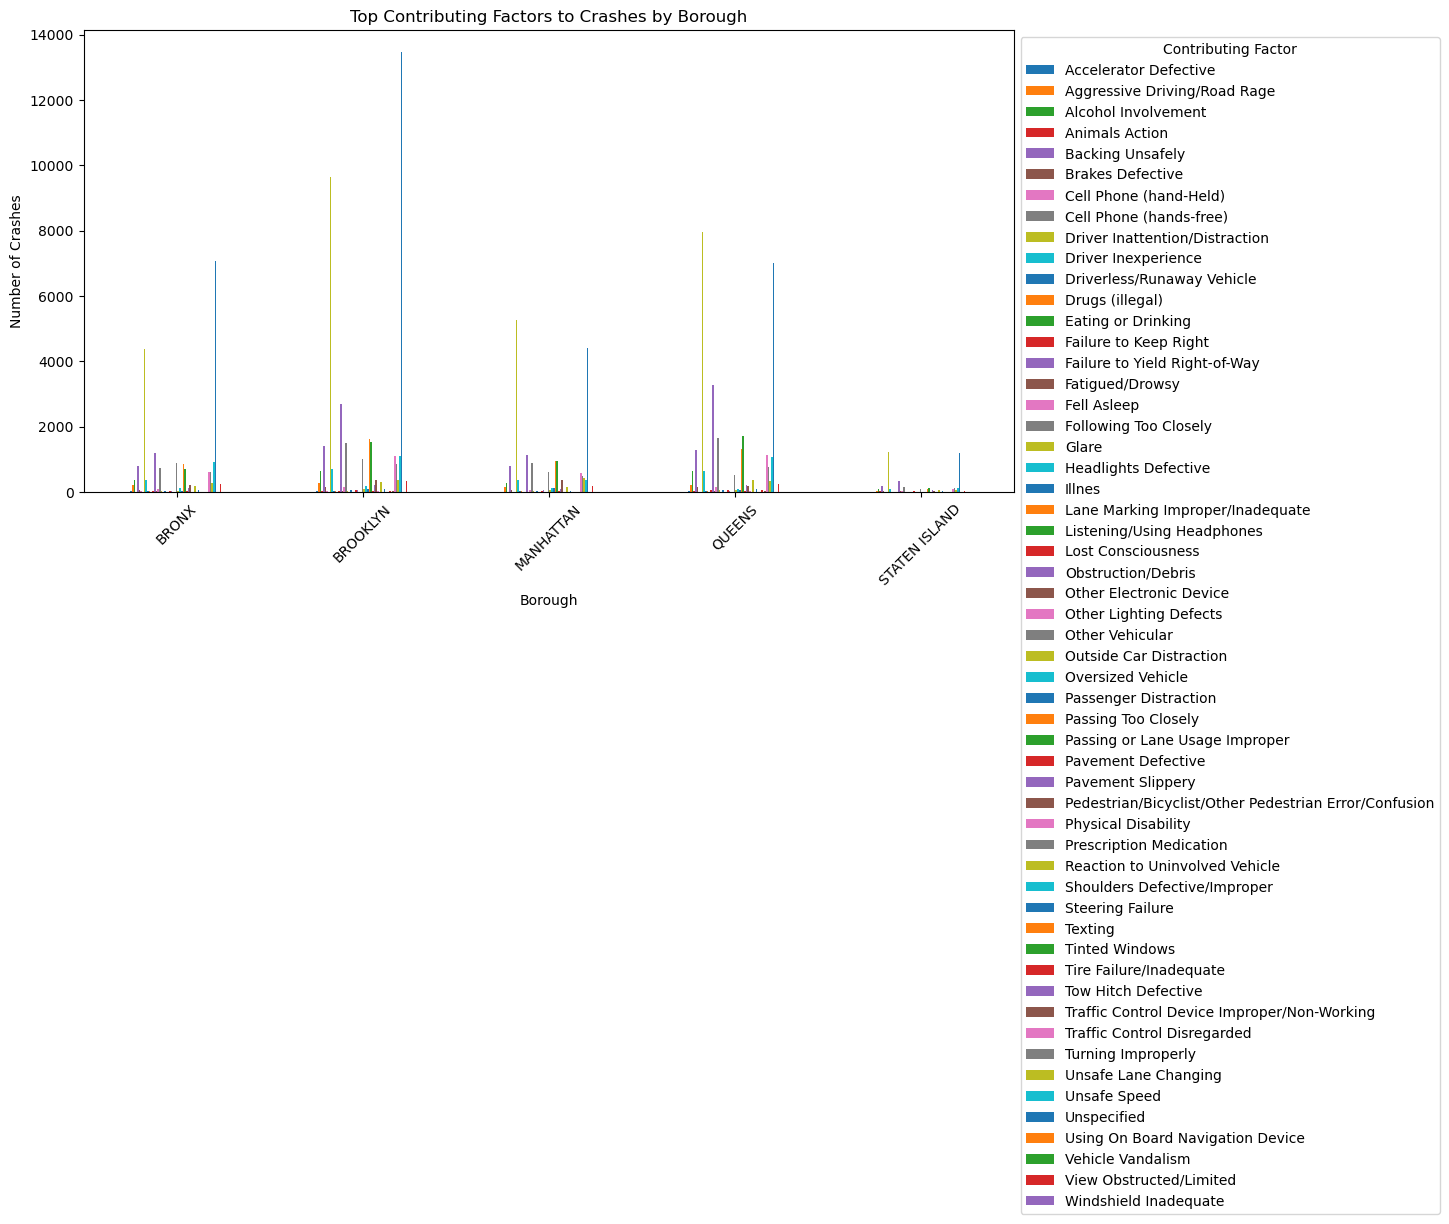

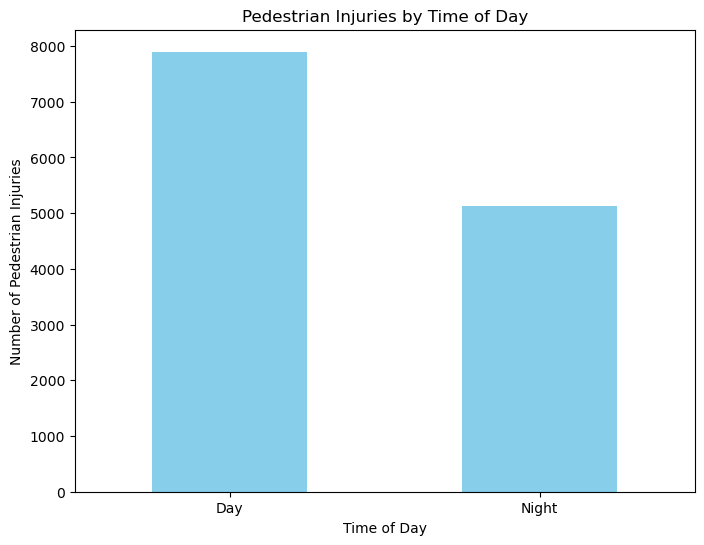

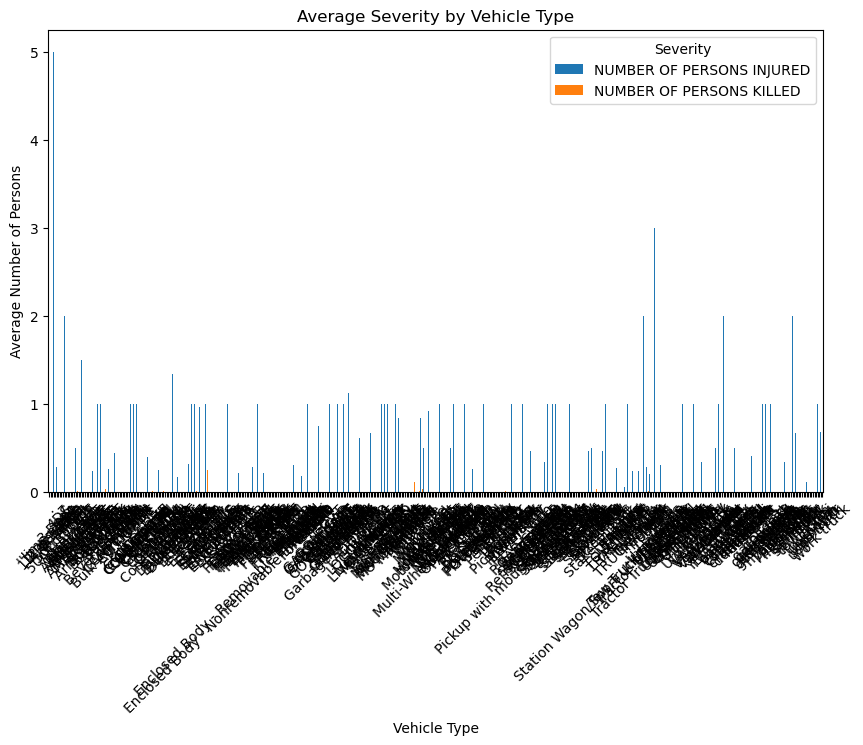

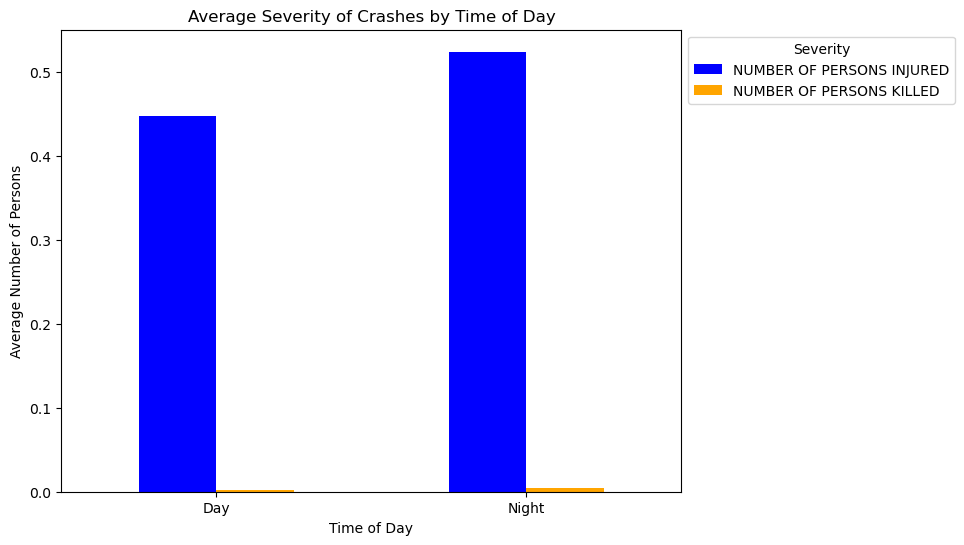

In [25]:
import matplotlib.pyplot as plt

# Visualization for Question 1
top_contributing_factors_by_borough.plot(kind='bar', figsize=(12, 6))
plt.title('Top Contributing Factors to Crashes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend(title='Contributing Factor', bbox_to_anchor=(1, 1))
plt.show()

# Visualization for Question 2
pedestrian_injuries_by_time_of_day.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Pedestrian Injuries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Pedestrian Injuries')
plt.xticks(rotation=0)
plt.show()

# Visualization for Question 3
vehicle_type_severity.plot(kind='bar', figsize=(10, 6))
plt.title('Average Severity by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Number of Persons')
plt.xticks(rotation=45)
plt.legend(title='Severity', bbox_to_anchor=(1, 1))
plt.show()

# Visualization for Question 4
severity_by_time_of_day.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Average Severity of Crashes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Persons')
plt.xticks(rotation=0)
plt.legend(title='Severity', bbox_to_anchor=(1, 1))
plt.show()


In [26]:
# Table of top 5 contributing factors by borough
top_contributing_factors_by_borough = df.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1'])['CONTRIBUTING FACTOR VEHICLE 1'].count().unstack().fillna(0)
top_contributing_factors_by_borough = top_contributing_factors_by_borough.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)
top_contributing_factors_by_borough


CONTRIBUTING FACTOR VEHICLE 1,Backing Unsafely,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Other Vehicular,Passing Too Closely,Passing or Lane Usage Improper,Unsafe Speed,Unspecified
BOROUGH,,,,,,,,,
BRONX,NaN,4384.0,1194.0,NaN,874.0,NaN,NaN,930.0,7067.0
BROOKLYN,NaN,9655.0,2693.0,NaN,NaN,1629.0,1531.0,NaN,13468.0
MANHATTAN,NaN,5272.0,1136.0,NaN,NaN,960.0,948.0,NaN,4412.0
QUEENS,NaN,7951.0,3265.0,1639.0,NaN,NaN,1706.0,NaN,7021.0
STATEN ISLAND,181.0,1210.0,339.0,155.0,NaN,NaN,NaN,NaN,1179.0


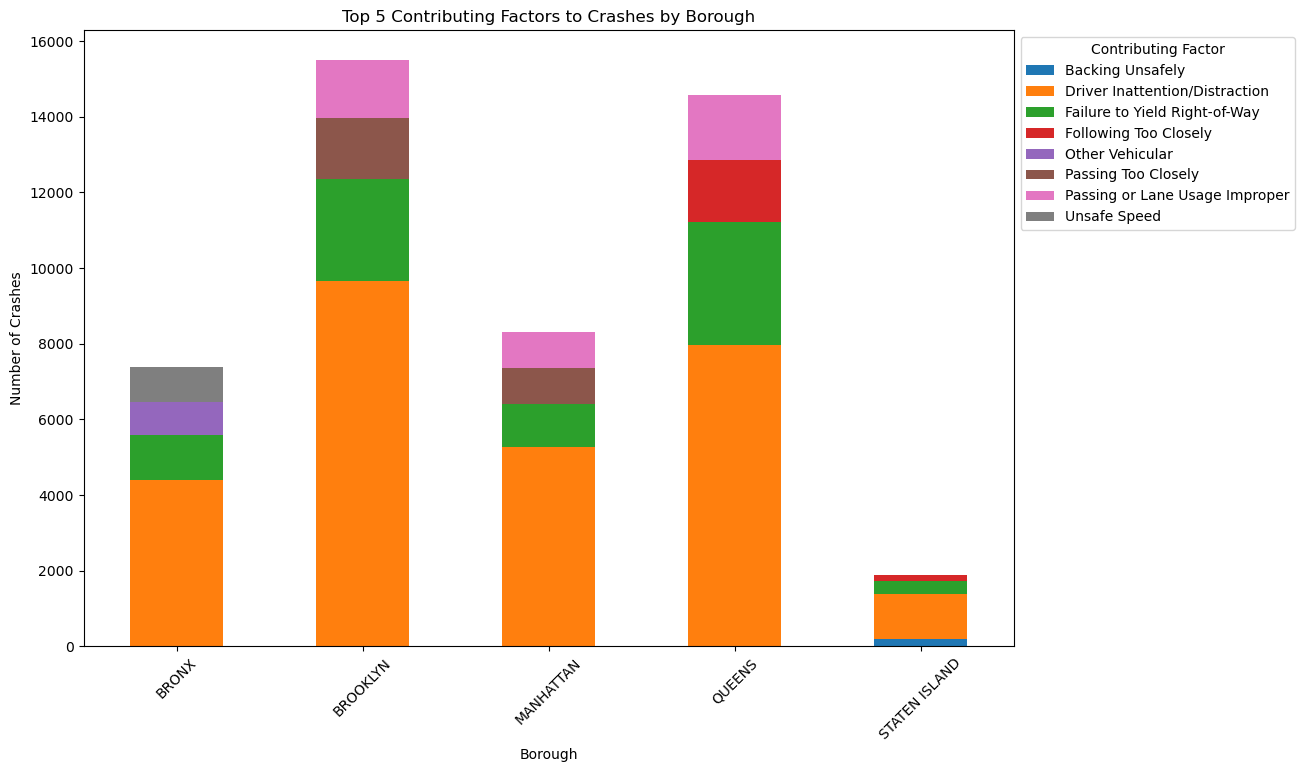

In [27]:
# Remove 'Unspecified' from the dataframe
top_contributing_factors_by_borough = top_contributing_factors_by_borough.drop('Unspecified', axis=1, errors='ignore')

# Plot the stacked bar plot
top_contributing_factors_by_borough.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Contributing Factors to Crashes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend(title='Contributing Factor', bbox_to_anchor=(1, 1))
plt.show()


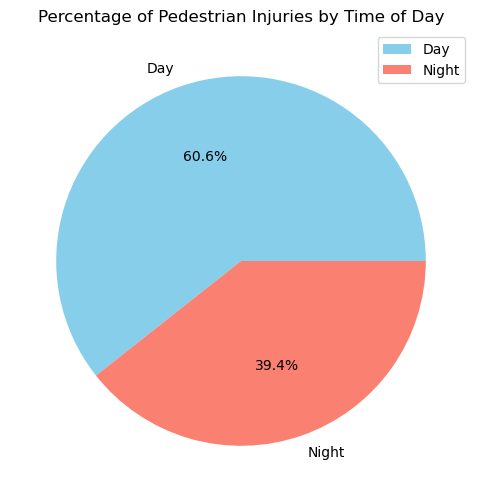

In [28]:
import matplotlib.pyplot as plt

# Plot the data as a pie chart
plt.figure(figsize=(8, 6))
pedestrian_injuries_by_time_of_day.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Percentage of Pedestrian Injuries by Time of Day')
plt.ylabel('')
plt.legend(['Day', 'Night'], bbox_to_anchor=(1, 1))
plt.show()
